In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
import numpy as np
import re
import glob
import pandas as pd
import math
import matplotlib.pyplot as plt

# DO NOT RUN

In [ ]:
# We read the audio files, extracted features and saved them in csv files attached.
# The code is given below!

# import python_speech_features as mfcc
# from scipy.io.wavfile import read

# def get_MFCC(audio, sr):
# features = mfcc.mfcc(audio, sr, 0.025, 0.01, 13, appendEnergy = True)
# return np.mean(features, axis=0)

# data = []
# labels = []
# lang = {"ur": 0, "ue": 1, "en": 2}
# for filename in glob.glob("Recordings/*"):
# sr, audio = read(filename)
# features = get_MFCC(audio, sr)
# data.append(features)
# labels.append(lang[filename[11:13]])

# data = np.array(data)
# labels = np.array(labels)

# np.savetxt("Dataset.csv", data2, delimiter=",")
# np.savetxt("Labels.csv", labels, delimiter=",") 

In [24]:
X = np.loadtxt("gdrive/MyDrive/ML/Phase2/Dataset.csv", delimiter=',')
y = np.loadtxt("gdrive/MyDrive/ML/Phase2/Labels.csv", delimiter=',')

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import zero_one_loss
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import hinge_loss
from sklearn.pipeline import make_pipeline

In [26]:
mean = np.mean(X, axis=0)
sd = np.std(X, axis=0)
norm_X = (X-mean)/sd

In [27]:
 X_train, X_test, y_train, y_test = train_test_split(norm_X, y, test_size=0.2, random_state=0, shuffle=True)

# KNN

k = 1:

acc = 0.7931530494821634 

[[3261  400  486]
 [ 464 4488  467]
 [ 530  529 3279]] 

              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78      4255
         1.0       0.83      0.83      0.83      5417
         2.0       0.76      0.77      0.77      4232

    accuracy                           0.79     13904
   macro avg       0.79      0.79      0.79     13904
weighted avg       0.79      0.79      0.79     13904
 


k = 2:

acc = 0.7931530494821634 

[[3261  400  486]
 [ 464 4488  467]
 [ 530  529 3279]] 

              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78      4255
         1.0       0.83      0.83      0.83      5417
         2.0       0.76      0.77      0.77      4232

    accuracy                           0.79     13904
   macro avg       0.79      0.79      0.79     13904
weighted avg       0.79      0.79      0.79     13904
 


k = 3:

acc = 0.8032220943613348 

[[3279  345  

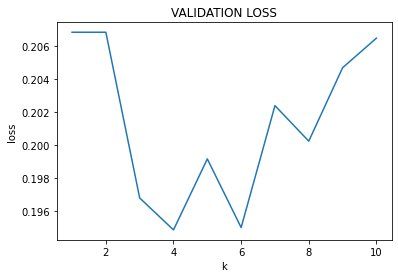

In [28]:
accuracyList = []
for i in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=i, weights="distance", p=2)
  prediction = cross_val_predict(knn, X_train, y_train)
  matrix = np.transpose(confusion_matrix(y_train, prediction, labels=[0, 1, 2]))
  accuracy = accuracy_score(y_train, prediction)
  accuracyList.append(accuracy)
  cr = classification_report(y_train, prediction)
  print(f"k = {i}:\n")
  print("acc =", accuracy,"\n")
  print(matrix, "\n")
  print(cr,"\n\n")

plt.plot([i for i in range(1,11)], [1-a for a in accuracyList])
plt.title("VALIDATION LOSS")
plt.ylabel("loss")
plt.xlabel("k")
plt.show()

In [29]:
# selected k=4 due to minimum loss in graph above

knn = KNeighborsClassifier(n_neighbors=4, weights="distance", p=2)
clf = BaggingClassifier(base_estimator=knn, n_estimators=100, random_state=0, bootstrap=True, max_samples=13904, max_features=13)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
matrix = np.transpose(confusion_matrix(y_test, prediction, labels=[0, 1, 2]))
accuracy = accuracy_score(y_test, prediction)
cr = classification_report(y_test, prediction)
print("Test results:")
print(accuracy)
print(matrix)
print(cr, )

Test results:
0.8256616800920599
[[ 850   84   85]
 [ 106 1172  127]
 [  91  113  848]]
              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82      1047
         1.0       0.83      0.86      0.84      1369
         2.0       0.81      0.80      0.80      1060

    accuracy                           0.83      3476
   macro avg       0.82      0.82      0.82      3476
weighted avg       0.83      0.83      0.83      3476



# Neural Net

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

max_iter = 200:

acc = 0.7170598388952819 

[[3015  648  654]
 [ 619 4178  801]
 [ 621  591 2777]] 

              precision    recall  f1-score   support

         0.0       0.70      0.71      0.70      4255
         1.0       0.75      0.77      0.76      5417
         2.0       0.70      0.66      0.68      4232

    accuracy                           0.72     13904
   macro avg       0.71      0.71      0.71     13904
weighted avg       0.72      0.72      0.72     13904
 




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (220) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (220) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (220) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (220) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

max_iter = 220:

acc = 0.7168440736478712 

[[2957  616  607]
 [ 630 4159  774]
 [ 668  642 2851]] 

              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70      4255
         1.0       0.75      0.77      0.76      5417
         2.0       0.69      0.67      0.68      4232

    accuracy                           0.72     13904
   macro avg       0.71      0.71      0.71     13904
weighted avg       0.72      0.72      0.72     13904
 




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (240) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (240) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (240) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (240) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

max_iter = 240:

acc = 0.7171317606444189 

[[2969  661  575]
 [ 575 4016  671]
 [ 711  740 2986]] 

              precision    recall  f1-score   support

         0.0       0.71      0.70      0.70      4255
         1.0       0.76      0.74      0.75      5417
         2.0       0.67      0.71      0.69      4232

    accuracy                           0.72     13904
   macro avg       0.71      0.71      0.71     13904
weighted avg       0.72      0.72      0.72     13904
 




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (260) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (260) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (260) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (260) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

max_iter = 260:

acc = 0.7153337169159953 

[[3092  698  704]
 [ 589 4108  782]
 [ 574  611 2746]] 

              precision    recall  f1-score   support

         0.0       0.69      0.73      0.71      4255
         1.0       0.75      0.76      0.75      5417
         2.0       0.70      0.65      0.67      4232

    accuracy                           0.72     13904
   macro avg       0.71      0.71      0.71     13904
weighted avg       0.72      0.72      0.71     13904
 




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (280) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (280) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (280) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (280) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

max_iter = 280:

acc = 0.7167002301495973 

[[3046  709  645]
 [ 584 4024  692]
 [ 625  684 2895]] 

              precision    recall  f1-score   support

         0.0       0.69      0.72      0.70      4255
         1.0       0.76      0.74      0.75      5417
         2.0       0.69      0.68      0.69      4232

    accuracy                           0.72     13904
   macro avg       0.71      0.71      0.71     13904
weighted avg       0.72      0.72      0.72     13904
 




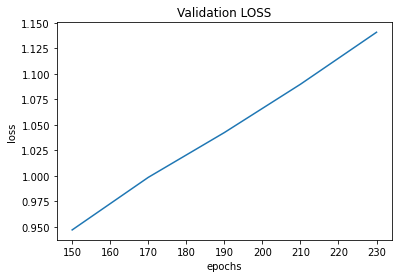

In [30]:
epoch = 20
LogLoss = []
for i in range(1, 6):
  clf = MLPClassifier(random_state=0, hidden_layer_sizes=(250, 250, 250, 250,), max_iter=epoch).fit(X_train, y_train)
  y_pred = cross_val_predict(clf, X_train, y_train, method="predict_proba")
  prediction = np.argmax(y_pred, axis=1)
  matrix = np.transpose(confusion_matrix(y_train, prediction, labels=[0, 1, 2]))
  accuracy = accuracy_score(y_train, prediction)
  l = log_loss(y_train, y_pred)
  LogLoss.append(l)
  cr = classification_report(y_train, prediction)
  print(f"max_iter = {epoch}:\n")
  print("acc =", accuracy,"\n")
  print(matrix, "\n")
  print(cr,"\n\n")
  epoch += 10

plt.plot([20+((i-1)*10) for i in range(1,6)], LogLoss)
plt.title("Validation LOSS")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (41) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


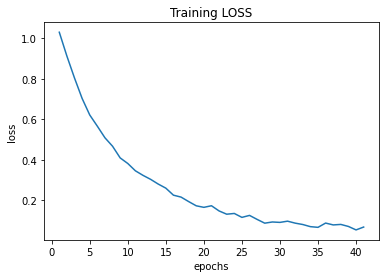

In [31]:
X_train, X_test, y_train, y_test = train_test_split(norm_X, y, test_size=0.2, random_state=0, shuffle=True)

clf = MLPClassifier(random_state=0, hidden_layer_sizes=(250, 250, 250, 250, ), max_iter=41).fit(X_train, y_train)
J = clf.loss_curve_

plt.plot([i for i in range(1,len(J)+1)], J)
plt.title("Training LOSS")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

In [32]:
prediction = clf.predict(X_test)
matrix = np.transpose(confusion_matrix(y_test, prediction, labels=[0, 1, 2]))
accuracy = accuracy_score(y_test, prediction)
cr = classification_report(y_test, prediction)
print("Test results:")
print(accuracy)
print(matrix)
print(cr,"\n\n")

Test results:
0.7911392405063291
[[ 811  110  106]
 [ 102 1109  124]
 [ 134  150  830]]
              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78      1047
         1.0       0.83      0.81      0.82      1369
         2.0       0.75      0.78      0.76      1060

    accuracy                           0.79      3476
   macro avg       0.79      0.79      0.79      3476
weighted avg       0.79      0.79      0.79      3476
 




# SVM

C = 2:

accuracy = 0.8307681242807825 

[[3467  318  406]
 [ 398 4726  468]
 [ 390  373 3358]] 

              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82      4255
         1.0       0.85      0.87      0.86      5417
         2.0       0.81      0.79      0.80      4232

    accuracy                           0.83     13904
   macro avg       0.83      0.83      0.83     13904
weighted avg       0.83      0.83      0.83     13904
 


C = 4:

accuracy = 0.8258774453394706 

[[3458  331  426]
 [ 413 4688  469]
 [ 384  398 3337]] 

              precision    recall  f1-score   support

         0.0       0.82      0.81      0.82      4255
         1.0       0.84      0.87      0.85      5417
         2.0       0.81      0.79      0.80      4232

    accuracy                           0.83     13904
   macro avg       0.82      0.82      0.82     13904
weighted avg       0.83      0.83      0.83     13904
 


C = 6:

accuracy = 0.8253020713463751 

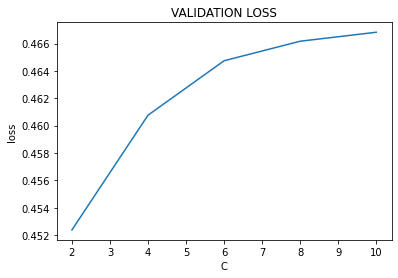

In [42]:
c = 2
hinge = []
for i in range(1, 6):
  clf = make_pipeline(StandardScaler(), SVC(random_state=0, probability=True, gamma=0.65, kernel="rbf", C=c, break_ties=True))
  y_pred = cross_val_predict(clf, X_train, y_train, method="predict_proba")
  prediction = np.argmax(y_pred, axis=1)
  matrix = np.transpose(confusion_matrix(y_train, prediction, labels=[0, 1, 2]))
  accuracy = accuracy_score(y_train, prediction)
  l = hinge_loss(y_train, y_pred)
  hinge.append(l)
  cr = classification_report(y_train, prediction)
  print(f"C = {c}:\n")
  print("accuracy =", accuracy,"\n")
  print(matrix, "\n")
  print(cr,"\n\n")
  c += 2

plt.plot([i*2 for i in range(1,6)], hinge)
plt.title("VALIDATION LOSS")
plt.ylabel("loss")
plt.xlabel("C")
plt.show()

In [43]:
clf = make_pipeline(StandardScaler(), SVC(random_state=0, gamma=0.65, kernel="rbf", C=1, break_ties=True, probability=True))
clf.fit(X_train, y_train)
pred = clf.predict_proba(X_train)
training_loss = hinge_loss(y_train, pred)
print("training loss = ", training_loss,"\n")

training loss =  0.08301815608052096 



In [44]:
prediction = clf.predict(X_test)
matrix = np.transpose(confusion_matrix(y_test, prediction, labels=[0, 1, 2]))
accuracy = accuracy_score(y_test, prediction)
cr = classification_report(y_test, prediction)
print("Test results:")
print(accuracy)
print(matrix)
print(cr,"\n\n") 

Test results:
0.844361334867664
[[ 868   56   93]
 [ 105 1240  140]
 [  74   73  827]]
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      1047
         1.0       0.84      0.91      0.87      1369
         2.0       0.85      0.78      0.81      1060

    accuracy                           0.84      3476
   macro avg       0.85      0.84      0.84      3476
weighted avg       0.84      0.84      0.84      3476
 


